In [7]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50


data_path = r'C:\Stored\All Files\Too transfer\Intership ML\Task_5_HandRecog\input\leapgestrecog\leapGestRecog'


In [8]:

image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass


image_data[0]


[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

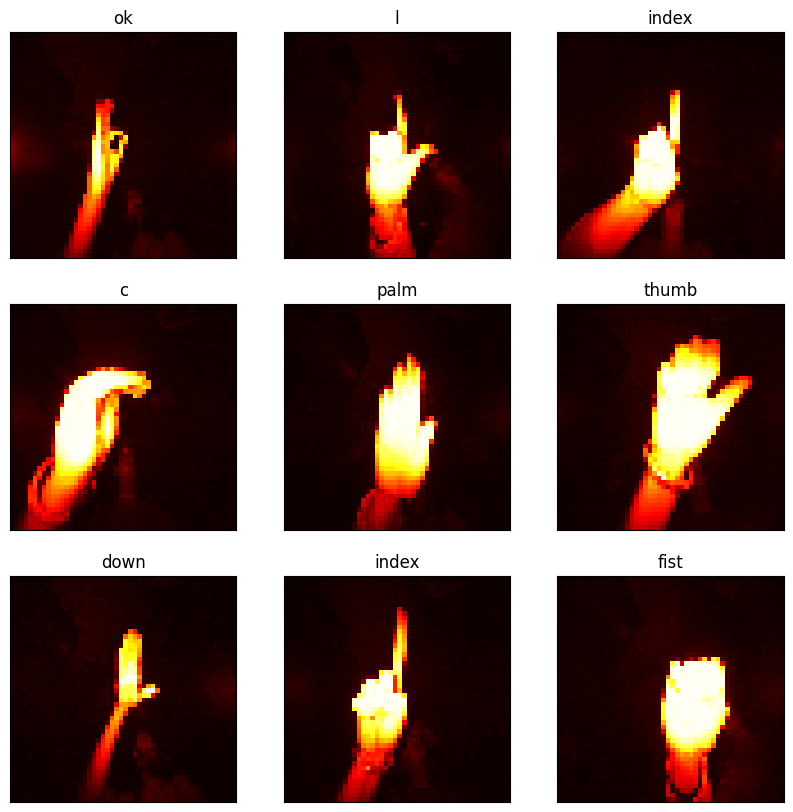

In [9]:

import random
random.shuffle(image_data)

input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)


plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()


In [10]:
# Normalize input data
input_data = np.array(input_data) / 255.0
input_data.shape

# One-hot encode the labels
label = np.array(label)
label = to_categorical(label, num_classes=10)

# Example of the first one-hot encoded label
print(label[0])


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
# Reshaping the data
input_data = input_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Split the input data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.3, random_state=0)

X_train.shape, X_test.shape


((14000, 50, 50, 1), (6000, 50, 50, 1))

In [12]:
# Define the model
model = keras.models.Sequential()

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

# Convolutional layer 2
model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Convolutional layer 3
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,669,290 (6.37 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7172 - loss: 0.8341 - val_accuracy: 0.9933 - val_loss: 0.0296
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9938 - loss: 0.0217 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9965 - loss: 0.0123 - val_accuracy: 0.9990 - val_loss: 0.0036
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9980 - loss: 0.0060 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.9998 - val_loss: 0.0024
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9995 - val_loss: 9.8584e-04
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9993 - val_loss: 0.0022


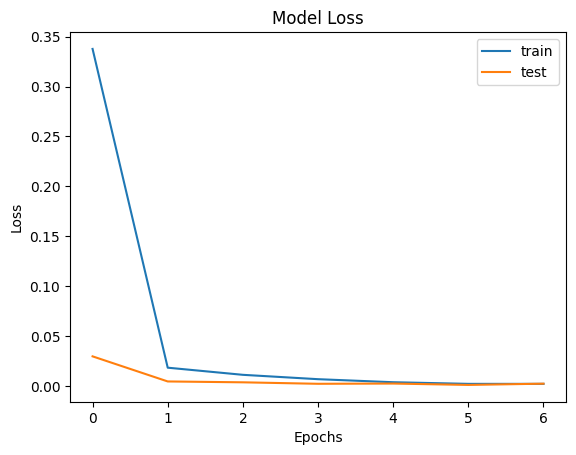

In [14]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


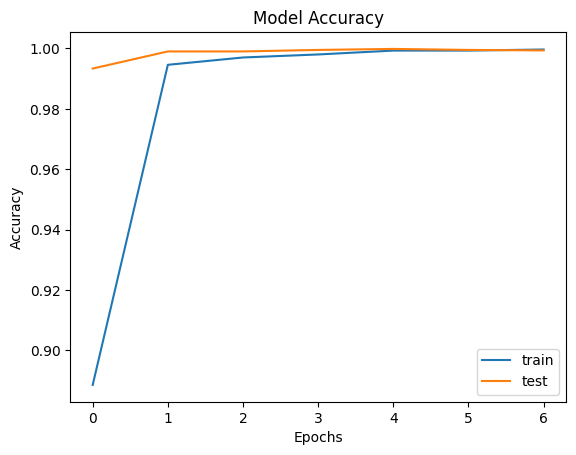

In [15]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [16]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9986 - loss: 0.0050
Test accuracy: 99.93%


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


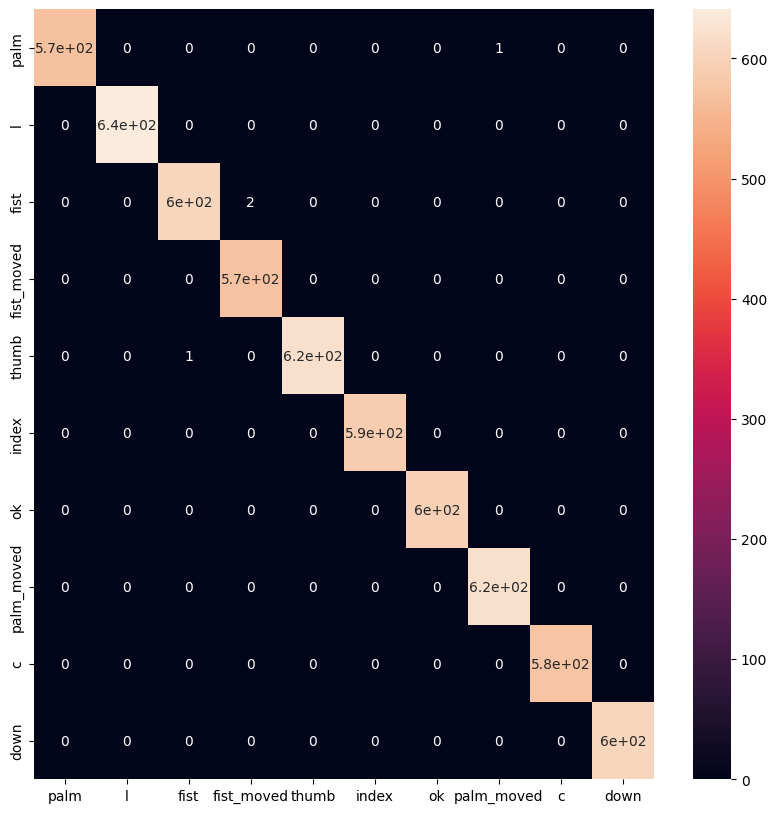

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Category labels
cat = [c[3:] for c in CATEGORIES]

# Plot the confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True, xticklabels=cat, yticklabels=cat)
plt.show()


In [18]:
# Save the trained model
model.save('hand_recognition_model.h5')
